In [2]:
from jiang2016 import morphology as morph
import datajoint as dj
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

INFO:root:Generating grammar tables from /usr/lib/python3.4/lib2to3/Grammar.txt
INFO:root:Generating grammar tables from /usr/lib/python3.4/lib2to3/PatternGrammar.txt


DataJoint 0.3.5 (July 21, 2016)
Loading local settings from dj_local_conf.json
Connecting share@datajoint.ninai.org:3306

INFO:datajoint.connection:Connected share@datajoint.ninai.org:3306


# Plot correction 

Plot the original and the corrected connection probability matrix. 

<b> +- std(b) p    1.355381
dtype: float64 p    0.097068
dtype: float64
0.666667
0.94150697617
[[ 1.          0.01570109]
 [ 0.01570109  1.        ]]


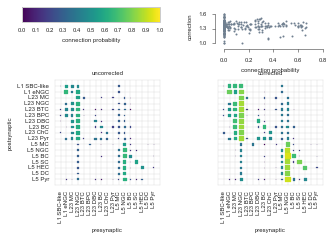

In [3]:
morph.OverlapGroup().plot_correction('corrected_probabilities.pdf')

In [1]:
morph.OverlapGroup().plot_correction('correction_factors.pdf', plot_q=True)

NameError: name 'morph' is not defined

# Plot schematic

Plot a schematic depiction of the estimation algorithm. 

In [1]:
morph.OverlapGroup().plot_schematic('schematic.pdf')

NameError: name 'morph' is not defined

# Plot medial-lateral vs. anterior-posterior extend

In [91]:
cells, regions = morph.Tree().fetch['node_coords','node_region']
med_lat = []
post_ant = []
for coords, reg in zip(cells, regions):
    reg = reg.squeeze()
    coords = np.array(coords)
    coords[:, [1, 2]] = coords[:, [2, 1]]
    coords[:, 1] *= 300/160
    cell_body = coords[reg==2,:].mean(axis=0)
    coords -= cell_body
    med_lat.append(np.percentile(np.abs(coords[:,1]),95))
    post_ant.append(np.percentile(np.abs(coords[:,0]),95))
    


0.909547738693


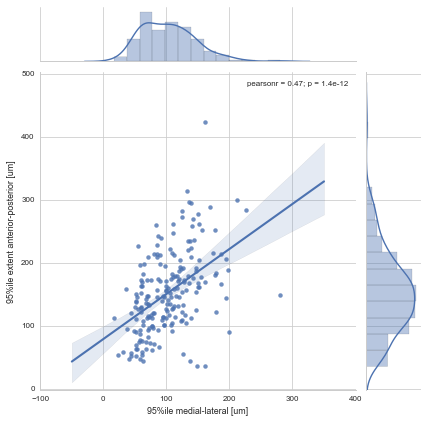

In [94]:
df = pd.DataFrame({'medial-lateral':med_lat, 'posterior-anterior': post_ant})
print(sum((df['medial-lateral'] < 250) & (df['posterior-anterior'] < 250))/len(df))
jp = sns.jointplot(x='medial-lateral', y='posterior-anterior', data = df, kind="reg")
jp.ax_joint.axis('equal')
#jp.ax_joint.set_xlim((0,1000))
#jp.ax_joint.set_ylim((0,1000))
jp.ax_joint.set_xlabel(r'95%ile medial-lateral [um]')
jp.ax_joint.set_ylabel(r'95%ile extent anterior-posterior [um]')
jp.fig.savefig('symmetry_assumption.pdf')